In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('appl_1980_2014.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [4]:
df.shape

(8465, 7)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

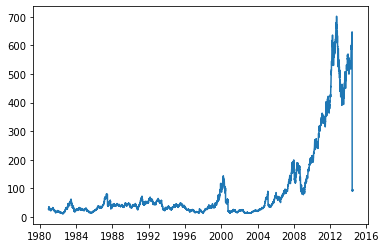

In [6]:
plt.plot(df['Date'], df['Close'])
plt.show()

In [7]:
X = df[['Open', 'High', 'Low']].values
y = df['Close'].values

In [8]:
X[:5]

array([[96.27, 96.8 , 93.92],
       [94.14, 95.99, 94.1 ],
       [93.67, 94.1 , 93.2 ],
       [93.87, 94.06, 93.09],
       [93.52, 94.07, 93.13]])

In [9]:
y[:5]

array([95.35, 95.97, 94.03, 93.48, 93.52])

In [10]:
minmax = MinMaxScaler()
X_scale = minmax.fit_transform(X)

In [11]:
y_scale = minmax.fit_transform(y.reshape(-1,1))

In [12]:
X_scale[:5]

array([[0.12317551, 0.12346711, 0.12042349],
       [0.12009432, 0.12229988, 0.1206849 ],
       [0.11941443, 0.11957634, 0.11937784],
       [0.11970374, 0.1195187 , 0.11921809],
       [0.11919744, 0.11953311, 0.11927618]])

In [13]:
y_scale[:5]

array([[0.1220518 ],
       [0.12294892],
       [0.1201418 ],
       [0.11934597],
       [0.11940385]])

In [14]:
regression = LinearRegression()
regression.fit(X_scale, y_scale)

LinearRegression()

In [15]:
regression.coef_

array([[-0.62382877,  0.91047395,  0.71318482]])

In [16]:
y_pred = regression.predict(X_scale)

In [18]:
y_pred = minmax.inverse_transform(y_pred)

In [19]:
y_pred[:5]

array([[94.86716781],
       [95.58994771],
       [93.52511332],
       [93.28537389],
       [93.5413535 ]])